In [1]:
import pandas as pd

DATA_PATH = "/workspaces/fake-news-detector/data/WELFake_Dataset.csv"

df = pd.read_csv(DATA_PATH)

df.head()


,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [2]:
# check missing values by columns
df.isnull().sum()

Unnamed: 0      0
title         558
text           39
label           0
dtype: int64

In [3]:
# clean dataframe from NaN Values

df = df.dropna()

In [4]:
df.isnull().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

## Clean text

In [5]:
import nltk

nltk.download('stopwords')
stop_words = nltk.corpus.stopwords.words('english')
stop_words = set(stop_words)

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
import string
# remove punctuation marks
def clean_word(word: str) -> str:

    word = word.lower()    #convierto todas las palabras a minusculas, para que sean iguales
    word = word.strip()    #elimino espacios para quedarme solo con las letras

    for letter in word:    #elimino simbolos de puntuación
        if letter in string.punctuation:
            word = word.replace(letter,'')
    
    return word

In [7]:
def clean_text(text: str) -> list[str]:

    clean_text_list = []
    for word in text.split():
        cleaned_word = clean_word(word)
        if cleaned_word not in stop_words:
            clean_text_list.append(cleaned_word)

    return clean_text_list

In [8]:
text = "hola!!!!, how are you? im good, thank you   89898123 123123"

clean_text(text)

['hola', 'im', 'good', 'thank', '89898123', '123123']

In [9]:
# Creamos una nueva columna que coge la noticia original y la limpia (con lo que hemos implementado anteriormente)

df["clean_text"] = df["text"].apply(clean_text)

In [10]:
df.head()

,Unnamed: 0,title,text,label,clean_text
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1,"[comment, expected, barack, obama, members, fy..."
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1,"[demonstrators, gathered, last, night, exercis..."
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0,"[dozen, politically, active, pastors, came, pr..."
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1,"[rs28, sarmat, missile, dubbed, satan, 2, repl..."
5,5,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...,1,"[say, one, time, someone, sued, southern, pove..."


## Vectorize Words

In [12]:
import gensim

EMBEDDING_DIM = 100

sentences = df["clean_text"]   #this is a list of list of words

model = gensim.models.Word2Vec(
    sentences = sentences,
    vector_size = EMBEDDING_DIM,
    window = 5,
    min_count = 1,
)

In [ ]:
model.wv["trump"] # la palabra trump se ha convertido en números...

array([-1.2462704e+00,  4.8600249e+00, -7.9972374e-01, -1.5223866e+00,
        1.7917325e+00, -5.1356745e-01,  3.1803617e-01, -1.6556739e+00,
       -1.9315394e+00, -2.3408558e+00,  1.6055014e+00, -1.3652724e-01,
       -2.7298520e+00, -2.2539179e+00, -7.9245043e-01,  4.9480662e+00,
       -5.0627382e-04,  1.1888899e+00, -1.6368878e+00,  1.3260759e+00,
       -9.4140875e-01,  1.4729674e+00, -5.9024733e-01, -6.3564408e-01,
       -8.2664555e-01, -7.0911580e-01, -3.5733082e+00,  2.3365638e+00,
        2.5313754e+00,  2.8475130e+00,  6.0127400e-02, -4.7105521e-01,
       -1.5095621e+00,  1.5915141e-01, -4.7127014e-01,  1.7528167e+00,
        2.8199875e+00,  4.9467124e-02, -1.2309779e+00,  4.0676489e+00,
       -4.7437084e-01, -1.8671055e-01, -1.2408222e+00, -1.9945048e+00,
        1.2187028e+00,  2.0311530e+00,  2.0848989e+00, -4.3685973e-01,
       -9.6119177e-01,  7.6858938e-01,  1.1946598e+00, -2.1315212e+00,
        1.7224239e+00,  4.4339395e+00, -3.3057430e-01,  2.3462582e+00,
      

In [14]:
model.wv.most_similar("spain")

[('catalonia', 0.8575478792190552),
 ('madrid', 0.8010545372962952),
 ('greece', 0.745439887046814),
 ('italy', 0.7326781749725342),
 ('catalans', 0.7167332768440247),
 ('catalan', 0.7080991268157959),
 ('puigdemont', 0.705421507358551),
 ('belgium', 0.6921337842941284),
 ('cyprus', 0.6887574791908264),
 ('rajoy', 0.6841884255409241)]

In [23]:
import numpy as np

def vectorize_text(text: list[str]) -> np.ndarray:      # vectoriza un texto promediando todos los vectores de palabras en el texto
    text_vector = np.zeros(EMBEDDING_DIM)  # vector vacio (longitud embedding_dim)
    for word in text:                      # por cada palabra, le decimos al modelo que nos de ese vector
        word_vector = model.wv[word]
        text_vector += word_vector         # text_vector = text_vector + word_vector 
    text_vector /= len(text)

    return text_vector


In [24]:
# add column with the text converted to vectors
df["vector"] = df["clean_text"].apply(vectorize_text)

In [25]:
df.head()

,Unnamed: 0,title,text,label,clean_text,vector
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1,"[comment, expected, barack, obama, members, fy...","[-0.9909366259487578, 0.02989202310320628, -0...."
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1,"[demonstrators, gathered, last, night, exercis...","[-0.7191784347274474, 0.4831537655332968, 0.43..."
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0,"[dozen, politically, active, pastors, came, pr...","[-0.8418639695002256, 0.2657419644508321, 0.02..."
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1,"[rs28, sarmat, missile, dubbed, satan, 2, repl...","[-0.8531961147458681, -0.19513896417587054, -0..."
5,5,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...,1,"[say, one, time, someone, sued, southern, pove...","[-0.3826874607436533, 0.21089163895132362, 0.2..."


## Train the Model

In [29]:
from sklearn.model_selection import train_test_split

X = np.stack(df["vector"].values)
y = df["label"].values

# eliminamos valores NaN
nan_mask = np.isnan(X)
rows_with_nan = np.any(nan_mask, axis=1)
indices = np.where(rows_with_nan)

X = np.delete(X, indices, axis=0)
y = np.delete(y, indices, axis=0)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [30]:
from sklearn.svm import SVC

clf = SVC()

In [31]:
clf.fit(X_train, y_train)

SVC()

In [33]:
# evaluate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

accuracy, precision, recall

(0.9420863055300516, 0.9414599574769666, 0.9422613136615122)

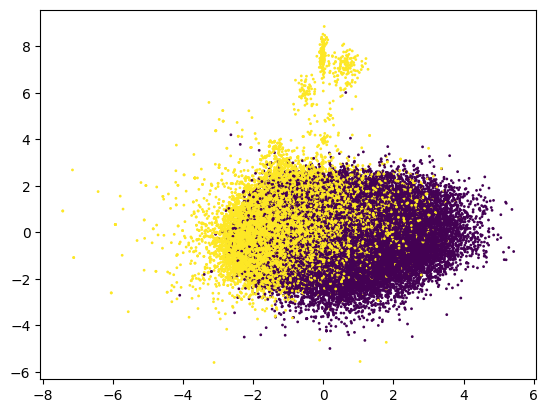

In [ ]:
#plot X_train vectors using PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X_train)

X_train_pca = pca.transform(X_train)

import matplotlib.pyplot as plt

plt.scatter(X_train_pca[:,0], X_train_pca[:,1], c=y_train, s=1)
plt.show()
